<a href="https://colab.research.google.com/github/jupitershot/Autolib-Electric-Car-Sharing/blob/master/Moringa_Data_Science_Prep_W4_Independent_Project_2019_11_Kennedy_Njoroge_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Autolib Car Sharing Review and Analysis

##Requirement
Analyze the Utilib car sharing data to solve the provided research questions


###Data

Datassets below provided

*   Autolib Dataset [http://bit.ly/Autolib_dataset]


##Importing Essential Libraries

In [0]:
import pandas as pd #Data manipulation and analysis
import numpy as np #Numerical Processing on arrays and matrices
import matplotlib.pyplot as plt #Generating visualizations
import seaborn as sns #Visualizations based on matplot lib

##Data Loading

In [0]:
#Import Autolib Dataset. Downloaded the content from URL above then uploaded onto the notebook.
url ='/content/Autolib_dataset.csv'
df_autolib = pd.read_csv(url)

In [16]:
#Check number of rows and columns
df_autolib.shape

(5000, 25)

In [17]:
#Display Sample records to validate records successfully imported 
pd.set_option('display.max_rows', 500)
df_autolib

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27


##Data Understanding

###Data Structure 
Exploration of:
- Dataset information. To check total counts per column, not null constraints and data types
- Dataset description. 
- Distinct values per column to identify categorical values
- Null values per column to identify missing values


In [18]:
#Dataframe Information to check data types, not null constraints
print(df_autolib.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
Address                5000 non-null object
Cars                   5000 non-null int64
Bluecar counter        5000 non-null int64
Utilib counter         5000 non-null int64
Utilib 1.4 counter     5000 non-null int64
Charge Slots           5000 non-null int64
Charging Status        5000 non-null object
City                   5000 non-null object
Displayed comment      111 non-null object
ID                     5000 non-null object
Kind                   5000 non-null object
Geo point              5000 non-null object
Postal code            5000 non-null int64
Public name            5000 non-null object
Rental status          5000 non-null object
Scheduled at           47 non-null object
Slots                  5000 non-null int64
Station type           5000 non-null object
Status                 5000 non-null object
Subscription status    5000 non-null object
year                   

In [19]:
#Descriptive statistics
df_autolib.describe()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.000000,5000.000000
mean,2.333600,2.333600,0.059600,0.123000,0.253400,82634.878400,1.932400,2018.0,4.0,4.941600,11.509200,29.270000
std,2.035274,2.035274,0.246698,0.356506,0.546304,8835.865721,1.905402,0.0,0.0,2.597063,6.893549,17.231741
min,0.000000,0.000000,0.000000,0.000000,0.000000,75001.000000,0.000000,2018.0,4.0,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,75012.000000,0.000000,2018.0,4.0,3.000000,6.000000,14.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,75019.000000,1.000000,2018.0,4.0,5.000000,11.000000,29.000000
75%,4.000000,4.000000,0.000000,0.000000,0.000000,92320.000000,3.000000,2018.0,4.0,7.000000,18.000000,44.000000
max,7.000000,7.000000,2.000000,3.000000,2.000000,95880.000000,7.000000,2018.0,4.0,9.000000,23.000000,59.000000


In [20]:
#Describer Non Integer variables
df_autolib_cat = df_autolib.dtypes[df_autolib.dtypes == 'object'].index
df_autolib[df_autolib_cat].describe()

,Address,Charging Status,City,Displayed comment,ID,Kind,Geo point,Public name,Rental status,Scheduled at,Station type,Status,Subscription status
count,5000,5000,5000,111,5000,5000,5000,5000,5000,47,5000,5000,5000
unique,1104,3,88,25,1105,4,1105,1105,4,8,3,3,3
top,8 Avenue de la Porte de Montrouge,nonexistent,Paris,"Station en parking (niv -2), accÃ¨s 4 av. Foch",paris-portedemontrouge-8,STATION,"48.8230593, 2.322823",Paris/Porte de Montrouge/8,operational,2016-07-27T15:32:21,station,ok,nonexistent
freq,13,2886,2816,8,13,4388,13,13,4618,10,4615,4623,4593


In [21]:
#Unique values for each column.
for col in list(df_autolib):
    print(col)
    print(df_autolib[col].unique())


Address
['2 Avenue de Suffren' '145 Rue Raymond Losserand'
 '2 Avenue John Fitzgerald Kennedy' ... '106 rue VercingÃ©torix'
 '134 boulevard National' '54 Boulevard SÃ©rurier']
Cars
[0 6 3 1 5 4 2 7]
Bluecar counter
[0 6 3 1 5 4 2 7]
Utilib counter
[0 1 2]
Utilib 1.4 counter
[0 2 1 3]
Charge Slots
[0 1 2]
Charging Status
['nonexistent' 'operational' 'broken']
City
['Paris' 'Le Bourget' 'Nanterre' 'Puteaux' 'Fontenay-aux-Roses'
 'Le Chesnay' 'Suresnes' 'Versailles' 'Malakoff' 'Issy-les-Moulineaux'
 'Saint-Cloud' 'SÃ¨vres' 'Bezons' 'Nogent-sur-Marne' 'CrÃ©teil'
 'Villejuif' 'Rueil-Malmaison' 'Villeneuve-la-Garenne' 'Montreuil'
 'Charenton-le-Pont' 'Courbevoie' 'AsniÃ¨res-sur-Seine' 'Garches' 'Drancy'
 'La Garenne-Colombes' 'VerriÃ¨res-le-Buisson' 'Le Blanc-Mesnil' 'Vanves'
 'Enghien-les-Bains' 'Sceaux' 'Levallois-Perret' 'Boulogne-Billancourt'
 'ChÃ¢tenay-Malabry' 'Pantin' 'Meudon' 'Gennevilliers' 'Vincennes'
 'Rungis' 'Colombes' 'Fontenay-Sous-Bois' 'Rosny-sous-Bois'
 'Bourg-la-Reine' 'C

In [22]:
#Null values for each column.
print(df_autolib.isnull().sum())

Address                   0
Cars                      0
Bluecar counter           0
Utilib counter            0
Utilib 1.4 counter        0
Charge Slots              0
Charging Status           0
City                      0
Displayed comment      4889
ID                        0
Kind                      0
Geo point                 0
Postal code               0
Public name               0
Rental status             0
Scheduled at           4953
Slots                     0
Station type              0
Status                    0
Subscription status       0
year                      0
month                     0
day                       0
hour                      0
minute                    0
dtype: int64


###Correlation

In [23]:
#To find the correlation among the columns using pearson method 
df_autolib.corr(method ='pearson') 

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute
Cars,1.000000,1.000000,0.044059,0.062537,-0.307950,0.269789,-0.581199,NaN,NaN,-0.022275,-0.089672,-0.003801
Bluecar counter,1.000000,1.000000,0.044059,0.062537,-0.307950,0.269789,-0.581199,NaN,NaN,-0.022275,-0.089672,-0.003801
Utilib counter,0.044059,0.044059,1.000000,0.084943,-0.040837,0.033837,-0.103350,NaN,NaN,0.000438,-0.030553,0.032824
Utilib 1.4 counter,0.062537,0.062537,0.084943,1.000000,-0.083032,0.028646,-0.166215,NaN,NaN,0.002575,-0.022967,0.012144
Charge Slots,-0.307950,-0.307950,-0.040837,-0.083032,1.000000,-0.372203,0.516690,NaN,NaN,0.004229,-0.006329,0.011133
Postal code,0.269789,0.269789,0.033837,0.028646,-0.372203,1.000000,-0.119291,NaN,NaN,-0.001765,0.001310,0.010900
Slots,-0.581199,-0.581199,-0.103350,-0.166215,0.516690,-0.119291,1.000000,NaN,NaN,-0.004517,0.002164,0.012430
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,-0.022275,-0.022275,0.000438,0.002575,0.004229,-0.001765,-0.004517,NaN,NaN,1.000000,0.017260,0.018156


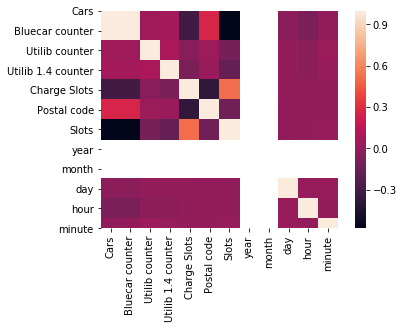

In [24]:
corr = df_autolib.corr()
sns.heatmap(corr,  square=True)
plt.show()

### Distribution

Univariate Distribution

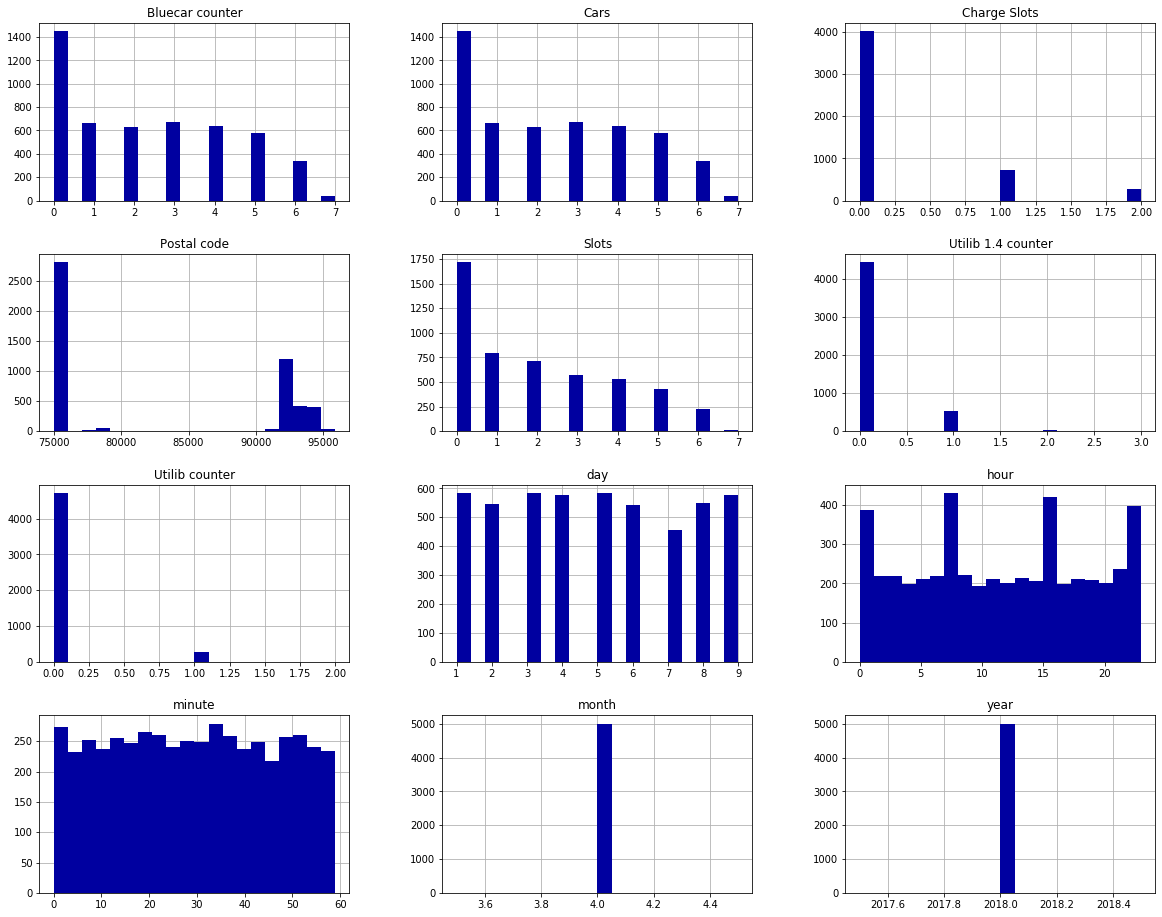

In [25]:
# Distribution
df_autolib.hist( bins=20, figsize=(20,16), color='#0000A0', zorder=3, rwidth=5)
plt.show() 

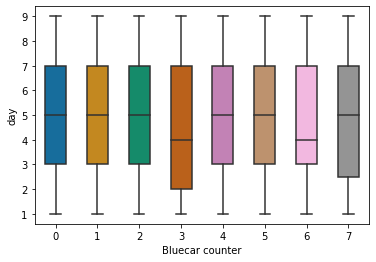

In [26]:
#Check interquartile distribution and outliers of Bluecars by day
bplot=sns.boxplot( x ='Bluecar counter', y= 'day',
                 data=df_autolib, 
                 width=0.5,
                 palette="colorblind")


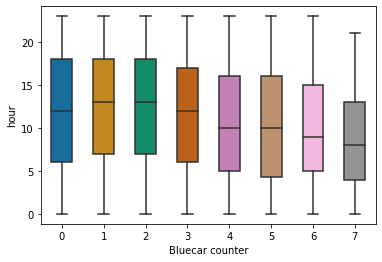

In [27]:
#Check interquartile distribution and outliers of Bluecars by hour
bplot=sns.boxplot( x ='Bluecar counter', y= 'hour',
                 data=df_autolib, 
                 width=0.5,
                 palette="colorblind")

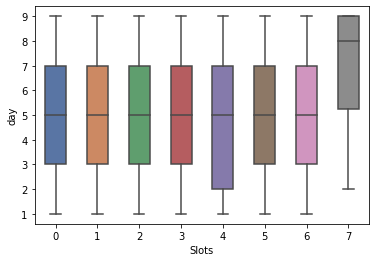

In [28]:
#Check interquartile distribution and outliers of Slots by days
bplot2=sns.boxplot( x ='Slots', y='day',
                 data=df_autolib, 
                 width=0.5,
                 palette="deep")


###Observations

**Observations**
1. Correlation: There is a direct correlation between ‘Cars’ and ‘Blue Cars Counter’ column is noted with a value of 1. ‘Cars’ column has similar values as ‘blue car counter’ column hence the correlation.
2. 1105 distinct stations noted. One station has no address.
3. Data Collection period: Data collected across from 1st to 9th April 2019.
4. Data quality issues: There are two columns with missing values i.e ‘displayed comments’ - 4,899  and  ‘Scheduled at’ - 4,965. 
5. Multiple columns having status of stations i.e status, subscription status and rental status depending on context.
Kind and station type columns define the attributes of a station
6. No outliers noted.

**Recommendations from observations**
1. Make cars column to have totals of blue car, utilib and utilib 1.4 cars to remove current redundancy with blue car.
2. Derive timestamp from year, month, day, hour, minute column.
3. Data set does not have number of cars hired or returned. This will have to be derived.
4. ‘Displayed comments’ and  ‘Scheduled at’ columns have significant null values. Scheduled values is validly null since the scheduled dates are only provided for stations with future status. This data set is relevant when exploring future expansion hence will be maintained.
'Displayed comments' column is irrelevant when answering research questions hence is recommended that it's dropped.
6. Scheduled at is a string with timestamp values. Field data type should be converted to timestamp.



 

##Data Preparation

Actions to be done are as per Action items arising from recommendations done during data understanding phase.

1. Creation of New Columns

a) Timestamp Column

In [0]:
#Create a timestamp column
df_autolib['Collection Timestamp']=pd.to_datetime(df_autolib[['day','month','year','hour','minute']])

In [30]:
#View top 3 records to confirm timestamp is recorded.
df_autolib.head(3)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,Collection Timestamp
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24,2018-04-06 07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14,2018-04-03 20:14:00


b) Cars Column

In [0]:
#Sum up bluecar , utilib and utilib 1.4 to ensure cars column is correcty summed
df_autolib['Cars']=df_autolib['Bluecar counter']+df_autolib['Utilib counter']+ df_autolib['Utilib 1.4 counter']

In [32]:
#View top 3 records to confirm cars column is properly summed up
df_autolib.head(3)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,Collection Timestamp
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24,2018-04-06 07:24:00
2,2 Avenue John Fitzgerald Kennedy,5,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14,2018-04-03 20:14:00


c) Create Hired and Returned Columns for Each Car Type

Current records just show the inventory of cars at a point in time. To get the number of cars hired or returned, we need to derive new columns with values derived by difference of cars in a station for each successive minute(s)

In [0]:
#Blue Cars Hired or Returned per stationuu
df_autolib['BlueCar Diff'] = df_autolib.sort_values(['Collection Timestamp']).groupby(['ID'])['Bluecar counter'].apply(lambda x:  x.shift(1) - x)

In [0]:
#Utilib Cars Hired or Returned per station
df_autolib['Utilib Diff'] = df_autolib.sort_values(['Collection Timestamp']).groupby(['ID'])['Utilib counter'].apply(lambda x:  x.shift(1) - x)

In [0]:
#Utilib 1.4 Cars Hired or Returned per station
df_autolib['Utilib 1.4 Diff'] = df_autolib.sort_values(['Collection Timestamp']).groupby(['ID'])['Utilib 1.4 counter'].apply(lambda x:  x.shift(1) - x)

In [0]:
#All Cars Hired or Returned
df_autolib['All Cars Diff'] = df_autolib.sort_values(['Collection Timestamp']).groupby(['ID'])['Cars'].apply(lambda x:  x.shift(1) - x)

In [0]:
#Sort the dataframe by collection timestamp for visibility
df_autolib = df_autolib.sort_values('Collection Timestamp',ascending=True)

In [38]:
df_autolib.isnull().sum()

Address                    0
Cars                       0
Bluecar counter            0
Utilib counter             0
Utilib 1.4 counter         0
Charge Slots               0
Charging Status            0
City                       0
Displayed comment       4889
ID                         0
Kind                       0
Geo point                  0
Postal code                0
Public name                0
Rental status              0
Scheduled at            4953
Slots                      0
Station type               0
Status                     0
Subscription status        0
year                       0
month                      0
day                        0
hour                       0
minute                     0
Collection Timestamp       0
BlueCar Diff            1105
Utilib Diff             1105
Utilib 1.4 Diff         1105
All Cars Diff           1105
dtype: int64

2. Fill Null values

In [0]:
 df_autolib.update(df_autolib[['BlueCar Diff','Utilib Diff','Utilib 1.4 Diff','All Cars Diff']].fillna(0))

In [40]:
#Display statistics for one station to validate correcteness of output
df_autolib[df_autolib['ID']== 'paris-portedechamperret-6']
# df_autolib[df_autolib['Rental status'] == 'Future']

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,Collection Timestamp,BlueCar Diff,Utilib Diff,Utilib 1.4 Diff,All Cars Diff
1088,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,1,6,25,2018-04-01 06:25:00,0.0,0.0,0.0,0.0
804,6 avenue de la Porte de Champerret,6,5,1,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,0,station,ok,nonexistent,2018,4,5,11,22,2018-04-05 11:22:00,-2.0,-1.0,0.0,-3.0
12,6 avenue de la Porte de Champerret,6,5,1,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,0,station,ok,nonexistent,2018,4,5,12,22,2018-04-05 12:22:00,0.0,0.0,0.0,0.0
3704,6 avenue de la Porte de Champerret,4,4,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,2,station,ok,nonexistent,2018,4,7,10,25,2018-04-07 10:25:00,1.0,1.0,0.0,2.0
3684,6 avenue de la Porte de Champerret,4,4,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,2,station,ok,nonexistent,2018,4,7,11,2,2018-04-07 11:02:00,0.0,0.0,0.0,0.0
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23,2018-04-08 17:23:00,1.0,0.0,0.0,1.0


3. Drop unrequired columns

In [0]:
# Dropping unrequired columns
df_autolib  = df_autolib.drop(['Charge Slots','Displayed comment','Kind','Geo point','Postal code','Rental status','Scheduled at','Slots','Status','Subscription status'], axis =1) 

In [43]:

#Verify column dropped
df_autolib.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charging Status,City,ID,Public name,Station type,year,month,day,hour,minute,Collection Timestamp,BlueCar Diff,Utilib Diff,Utilib 1.4 Diff,All Cars Diff
1046,112 Rue Monge BÃ¢timent Lieu-dit,0,0,0,0,nonexistent,Paris,paris-monge-112,Paris/Monge/112,station,2018,4,1,0,0,2018-04-01 00:00:00,0.0,0.0,0.0,0.0
1107,19 place de la Madeleine,0,0,0,0,nonexistent,Paris,paris-madeleinetronchet-parking,Paris/Madeleine Tronchet/Parking,station,2018,4,1,0,2,2018-04-01 00:02:00,0.0,0.0,0.0,0.0
2874,44 rue SÃ©bastien Mercier,0,0,0,0,nonexistent,Paris,paris-sebastienmercier-44,Paris/SÃ©bastien Mercier/44,station,2018,4,1,0,2,2018-04-01 00:02:00,0.0,0.0,0.0,0.0
2059,2 Avenue Mozart,1,1,0,0,nonexistent,Paris,paris-mozart-2,Paris/Mozart/2,station,2018,4,1,0,3,2018-04-01 00:03:00,0.0,0.0,0.0,0.0
4453,2 rue Neuve Saint-Pierre,0,0,0,0,operational,Paris,paris-neuvesaintpierre-2,Paris/Neuve Saint-Pierre/2,station,2018,4,1,0,4,2018-04-01 00:04:00,0.0,0.0,0.0,0.0



##Data Preparation Notes
Negative means car is being returned

Positive means car has  been picked up.

##Data Analysis

1. Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018





In [44]:
#Popular hour for Picking cars
print(df_autolib[(df_autolib['City']=='Paris') & (df_autolib['BlueCar Diff'] > 0)].groupby(['hour'])['BlueCar Diff'].sum().sort_values(ascending =False).head(1))


hour
21    109.0
Name: BlueCar Diff, dtype: float64


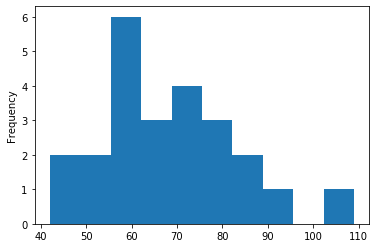

In [46]:
#Plot pattern
df_autolib[(df_autolib['City']=='Paris') & (df_autolib['BlueCar Diff'] > 0)].groupby(['hour'])['BlueCar Diff'].sum().sort_values(ascending =False).plot.hist()

The most popular hour for picking blue cars is 21:00 hrs

In [141]:
# Comparison: Popular hour for Picking Autolib cars
print(df_autolib[(df_autolib['City']=='Paris') & (df_autolib['BlueCar Diff'] > 0)].groupby(['hour'])['Utilib Diff'].sum().sort_values(ascending =False).head(1))

hour
23    5.0
Name: Utilib Diff, dtype: float64


In [142]:
#Comparison: Popular hour for Picking Autolib 1.4 cars
print(df_autolib[(df_autolib['City']=='Paris') & (df_autolib['BlueCar Diff'] > 0)].groupby(['hour'])['Utilib 1.4 Diff'].sum().sort_values(ascending =False).head(1))

hour
11    8.0
Name: Utilib 1.4 Diff, dtype: float64


2. What is the most popular hour for returning cars?

In [0]:
#Popular hour for returning carshttps://zindi.africa/competitions/busara-mental-health-prediction-challenge
df_autolib[(df_autolib['City']=='Paris') & (df_autolib['BlueCsar Diff'] < 0)].groupby(['hour'])['BlueCar Diff'].sum().sort_values(ascending =True).head(1)

hour
12   -104.0
Name: BlueCar Diff, dtype: float64

Most popular hour for returning cars is 12 noon

3. What station is the overall most popular



In [0]:
df_autolib['All Cars Diff Abs'] = df_autolib['All Cars Diff'].abs()
df_autolib['BlueCar Diff Abs'] = df_autolib['BlueCar Diff'].abs()
# df_autolib.groupby(['ID'])['BlueCar Diff'].abs().sum().sort_values(ascending =True).head(10)

In [0]:
df_autolib['All Cars Diff Abs']

1046    0.0
1107    0.0
2874    0.0
2059    0.0
4453    0.0
       ... 
2552    2.0
2672    1.0
4582    2.0
4443    0.0
3201    0.0
Name: All Cars Diff Abs, Length: 5000, dtype: float64

4. What station is the most popular at the most popular picking hour?


In [139]:
# Station that is most popular in picking
df_autolib[(df_autolib['hour']==21)].groupby('ID')['BlueCar Diff Abs'].sum().sort_values(ascending=False).head(1)

ID
paris-saintmande-94    7.0
Name: BlueCar Diff Abs, dtype: float64

##Evaluation

1. Popularity

a) The most popular hour for picking blue cars is between 20:00 and 21:00 hrs.

b) The most popular hour for picking utilib cars is between 22:00 and 23:00 hrs.

c) The most popular hour for picking utilib 1.4 cars is between 10:00 and 11:00 hrs.

2. Popular hour for returning cars is 12 noon

##Recommendation

1. The hourly computation of cars picked or returned is not accurate as some hours do not have any datasets. This is in scenarios where there are missing values in the data sample/.
More analysis is required with more larger dataset than 5000.

2. There are different patterns of vehicle pickup across blue car, utilib and utilib 1.4. Therebeing, different business strategy is preferred for each.

3. Review of the business model is desired. During peak hours, cars are shifting from high demand zones to low demand zones. Return rate of the cars to high demand zone is only done in following day hence poor productivity as cars are hired only once at night at high demand stations.
Review of the model to consider having drivers return the cars to high demand zones proposed.

4. More analysis for stations and productivity of charging stations required